In [19]:
push!(LOAD_PATH, "../src")
include("../src/lanczos.jl")
include("../src/estimators.jl")
include("../src/utils.jl")

using .StochasticLanczos
using .Estimators
using .Utils
using LinearAlgebra
using Plots

In [37]:
include("bcsstk09_case.jl");

In [38]:
s = 60
b = 1
k_converged = 40
Ω_provided = rand([-1,1], n, s)
converged_estimate = hutchinson_estimator(f, matvecA, n, s, b, k_converged; Ω_provided=Ω_provided, 
    reorthogonalization_fraction=1.0)

1.83088786342108e10

In [53]:
ks = collect(1:1:20)
bs = divisors(s)[1:end-1]
partial_hutchinson_estimator = (b, k) -> 
                hutchinson_estimator(f, matvecA, n, s, b, k; Ω_provided=Ω_provided, reorthogonalization_fraction=1.0)
block_estimates = compute_block_estimates(ks, bs, partial_hutchinson_estimator);

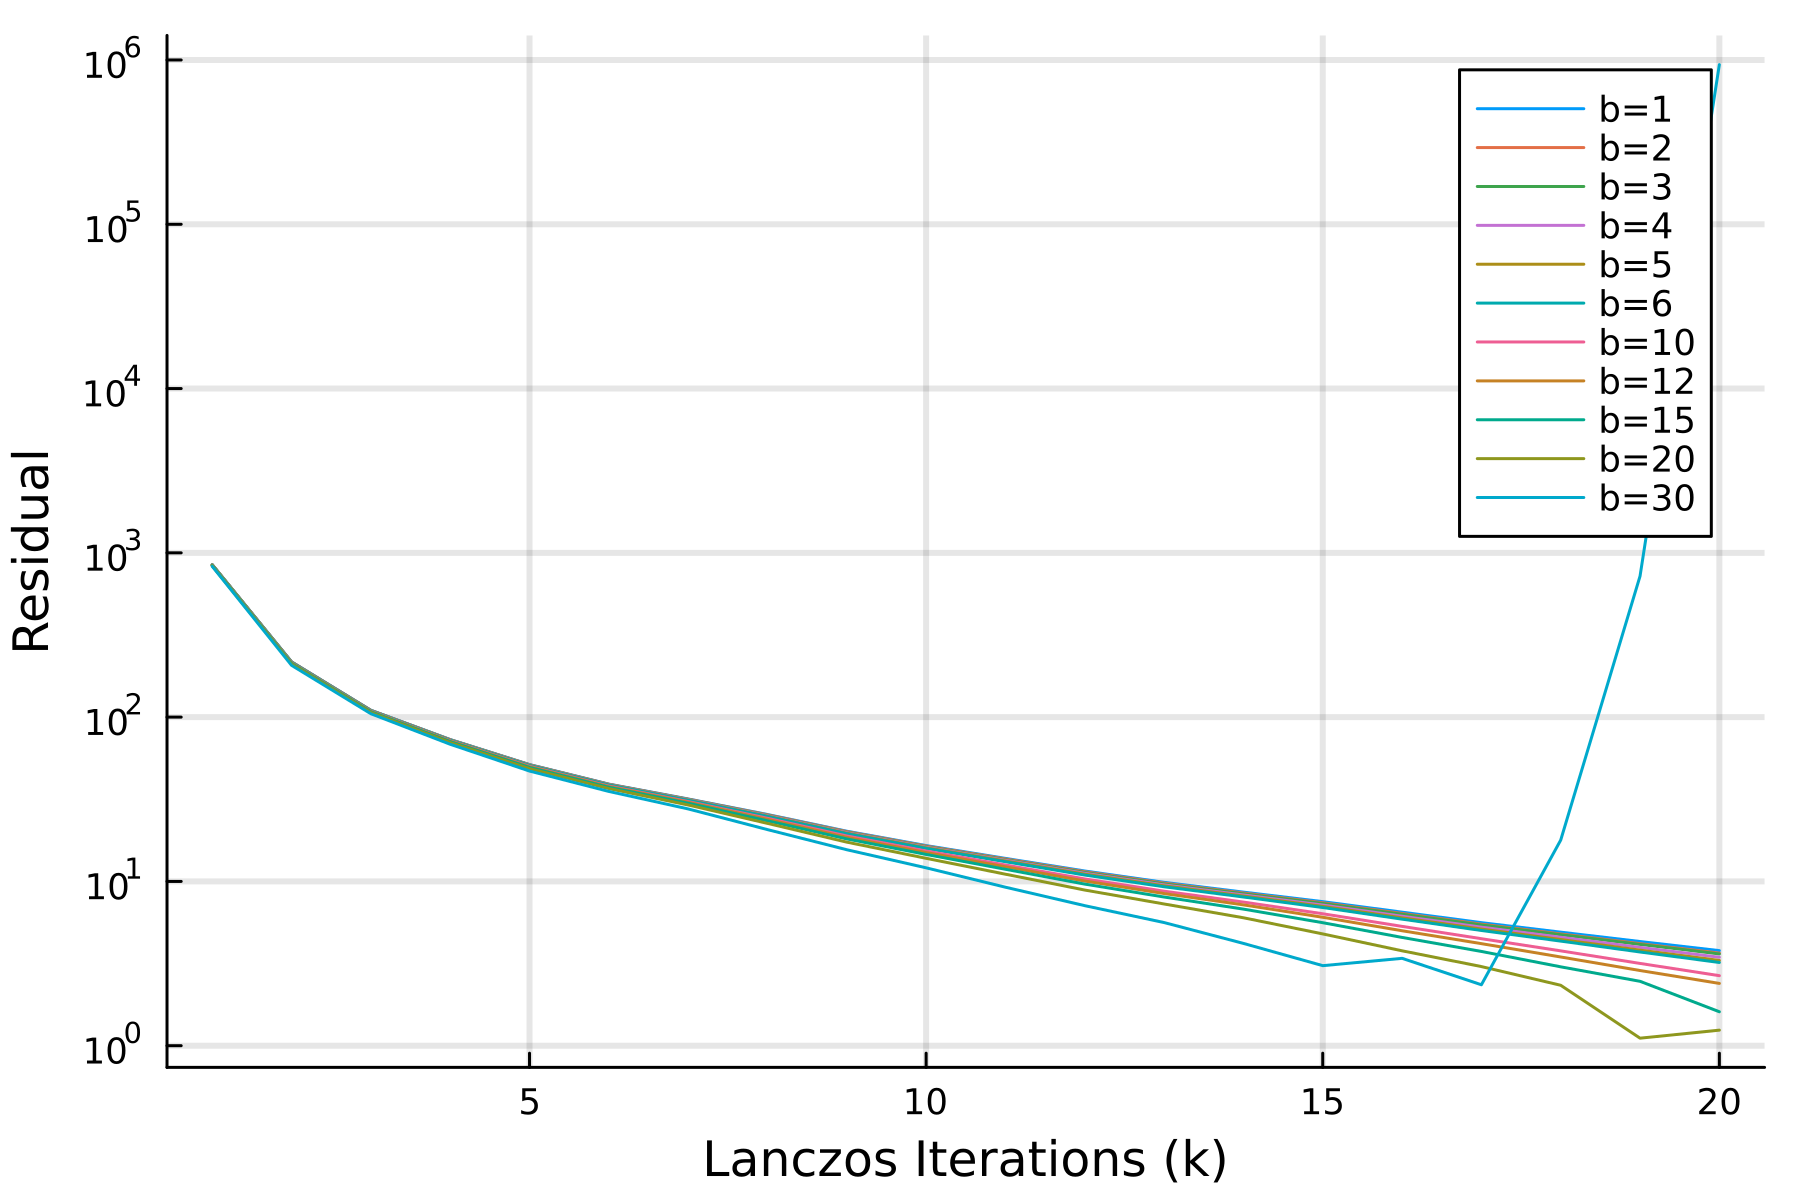

In [54]:
p = plot_block_estimates(block_estimates, ks, bs, converged_estimate; k_max=ks[end], logscale=true)
plot!(dpi=300)